In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  # Give nice white background with grid
%matplotlib inline

#from pandas.io.data import DataReader

from pandas_datareader import data, wb

from datetime import datetime

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [5]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100
2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800
2016-12-29,783.330017,785.929993,778.919983,782.789978,782.789978,742200
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300


In [6]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900
2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900
2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500
2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900


In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,149.587211,150.551235,148.632789,149.694860,148.624815,2.708154e+07
std,15.109477,15.201367,14.837081,15.005064,15.548185,1.130635e+07
min,115.800003,116.330002,114.760002,115.820000,113.986984,1.402670e+07
25%,141.445000,142.019996,140.529999,141.309998,139.676521,2.034815e+07
50%,151.500000,153.330002,149.899994,151.020004,150.010727,2.436150e+07
75%,159.284996,160.340004,158.055000,159.459999,158.791077,2.994720e+07
max,175.110001,177.199997,174.860001,176.419998,176.419998,1.119850e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-12-27 to 2017-12-22
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


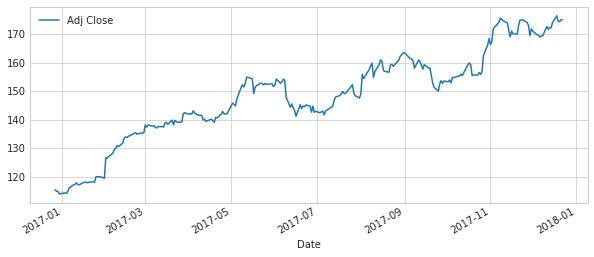

In [23]:
AAPL['Adj Close'].plot(legend=True
                       ,figsize=(10,4))

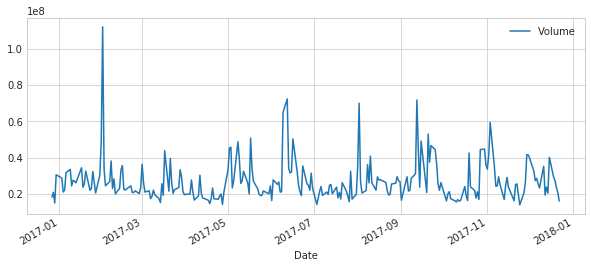

In [24]:
AAPL['Volume'].plot(legend=True
                       ,figsize=(10,4))

In [25]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


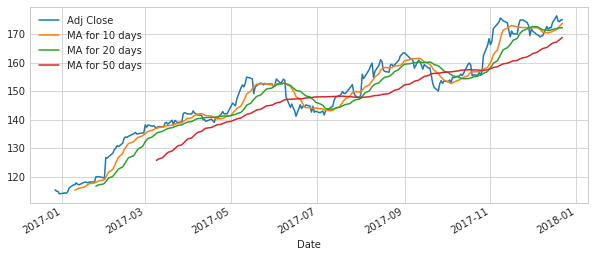

In [28]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

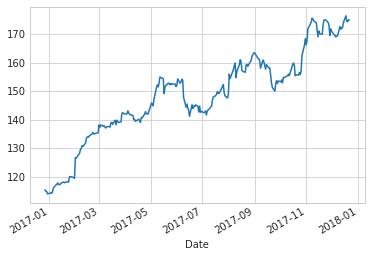

In [31]:
AAPL['Adj Close'].plot()

In [35]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

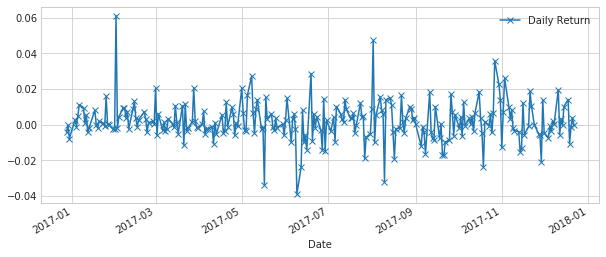

In [41]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='-',marker='x')

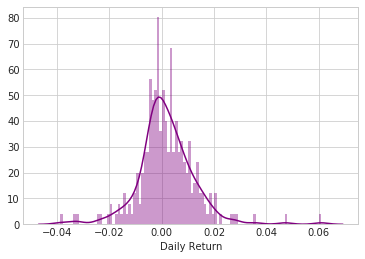

In [46]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [47]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Dialy Retuen,Daily Return
Date,,,,,,,,,,,
2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900,NaN,NaN,NaN,NaN,NaN
2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900,NaN,NaN,NaN,-0.004264,-0.004264
2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500,NaN,NaN,NaN,-0.000257,-0.000257
2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300,NaN,NaN,NaN,-0.007796,-0.007796
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.311760,28781900,NaN,NaN,NaN,0.002849,0.002849


In [ ]:
AAPL[]